<a href="https://colab.research.google.com/github/Maxwell-Muthui-Mwangi/BSCIT-Machine-Learning-Assignment-2/blob/main/machinelearningassignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A. You are provided with the dataset diabetes.csv. Your task is to first inspect it to see if there is any need for preprocessing the data. Check whether there is any need for scaling, conversion of any feature from categorical to numerical, or filling in missing values in any of the columns. This last possibility may not be obvious.

When you inspect the data, you may see that some zero entries do not make sense. For example, the thickness of a person's skin cannot be zero. Here is how you can solve this problem:

1. Convert the invalid zeros to nulls. A null value will appear as NaN when viewed using pandas but it will be blank when viewed in Excel. The reason for doing this conversion is that NaNs can be filled quite easily using scikit learn.

As an example, suppose you have a dataset named data that has ten columns (features). Two of these columns, column X and column Y contain zeros that don't make sense. To convert the zeros to nulls in just column X and column, you can do the following:

import numpy as np
cols = ['column X', 'column Y']
data[cols] = data[cols].replace({0:np.nan})

2. Convert the nulls into the mean or median value as we did with the California housing prices dataset.



B. Once you have finished preprocessing the data, carry out k-fold cross-validation on the following two algorithms:
KNN
Decision tree

C. Write down your observations and conclusions.

D. Submit the notebook on ZDS



Convert the notebook to a PDF file and submit

Let's start by inspecting the provided dataset diabetes.csv to determine if there is a need for preprocessing. I'll perform the following steps:

Load the dataset and display the first few rows to understand its structure.
Check for any columns that contain zero entries which may be invalid (e.g., skin thickness).
Convert the invalid zeros to NaNs.
Fill the NaNs with the mean or median values.
Perform k-fold cross-validation on KNN and Decision Tree algorithms.
Write down observations and conclusions.
I'll begin by loading the dataset and inspecting its contents. Let's get started.

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/diabetes (1).csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The dataset has the following columns:

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome
We need to inspect columns such as Glucose, BloodPressure, SkinThickness, Insulin, and BMI to check for invalid zero entries. These values shouldn't be zero as it wouldn't make sense for a human being. Next, we'll convert these invalid zeros to NaNs.

In [ ]:
import numpy as np

# Columns to check for invalid zero entries
columns_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Convert the invalid zeros to NaNs
data[columns_with_invalid_zeros] = data[columns_with_invalid_zeros].replace({0: np.nan})

# Display the updated dataframe to verify the changes
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


 Convert the nulls into the mean or median value

In [ ]:
# Fill NaNs with the median values of their respective columns
data.fillna(data.median(), inplace=True)

# Verify the changes by checking for any remaining NaNs
data.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

All missing values have been filled successfully. The data is now ready for further analysis and modeling.

Next, we will perform k-fold cross-validation on two algorithms: KNN and Decision Tree. Let's proceed with this step.

Import the necessary libraries:


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler


Define the features and target variable:

In [ ]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']


Scale the features:

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Initialize k-fold cross-validation:

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)


Perform k-fold cross-validation for KNN:

In [ ]:
knn = KNeighborsClassifier()
knn_scores = cross_val_score(knn, X_scaled, y, cv=kf)


Perform k-fold cross-validation for Decision Tree:

In [ ]:
dt = DecisionTreeClassifier(random_state=1)
dt_scores = cross_val_score(dt, X_scaled, y, cv=kf)


Output the scores:


In [ ]:
print("KNN scores:", knn_scores)
print("Decision Tree scores:", dt_scores)


KNN scores: [0.7987013  0.74025974 0.69480519 0.77777778 0.73202614]
Decision Tree scores: [0.7012987  0.67532468 0.67532468 0.73856209 0.71895425]


Observations and Conclusions


Data Inspection and Preprocessing
Loading and Structure Understanding:

The dataset contains 9 columns: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, and Outcome.
Checking for Invalid Zero Entries:

Columns Glucose, BloodPressure, SkinThickness, Insulin, and BMI were identified to potentially contain invalid zero entries.
Conversion of Invalid Zeros to NaNs:

Invalid zero entries in the identified columns were successfully converted to NaNs.
Filling NaNs:

NaNs were filled with the median values of their respective columns to handle missing data effectively.
Model Training and Evaluation
K-Fold Cross-Validation:

The dataset was split into features (X) and target variable (y).
Features were scaled using StandardScaler.
K-fold cross-validation (5 folds) was used to evaluate the performance of KNN and Decision Tree classifiers.
Model Performance:

KNN and Decision Tree classifiers were evaluated using k-fold cross-validation.
The performance scores (accuracy) were obtained for each fold and averaged.


Observations:
Data Preprocessing:

Converting invalid zero entries to NaNs and filling them with median values ensures that the dataset is clean and ready for modeling.
Scaling the features is crucial for models like KNN that are sensitive to the scale of data.
Model Evaluation:

KNN and Decision Tree classifiers are commonly used algorithms with different strengths.
KNN typically performs well with a smaller number of features and when the data is well-scaled.
Decision Tree can handle non-linear relationships and does not require feature scaling, but it is prone to overfitting.



Conclusions:
Data Quality:

Proper data preprocessing, including handling missing values and scaling, is essential for building robust machine learning models.
Model Selection:

Both KNN and Decision Tree classifiers can be effective, but their performance depends on the specific characteristics of the dataset.
Cross-validation helps in assessing the generalizability of the models and selecting the best performing one.
Future Work:

Experiment with different numbers of neighbors in KNN and different depths in Decision Tree to optimize performance.
Explore other algorithms such as Random Forest and SVM to compare performance.
Conduct feature engineering to improve model accuracy.
By following these steps and observations, you can ensure a thorough analysis and build effective machine learning models for the given dataset.

To analyze the dataset, let's create some plots to visualize the distribution and relationships of key features. This will help in understanding the data better and identifying which features are important for the analysis.

We'll create the following plots:

Distribution plots for Glucose, BloodPressure, SkinThickness, Insulin, and BMI to see their distribution and check for any anomalies.
Pair plot to see the relationships between features.
Box plots to identify any outliers in the key features.

Import the necessary libraries:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Set the style for the plots:

In [ ]:
sns.set(style="whitegrid")

Create distribution plots for key features:

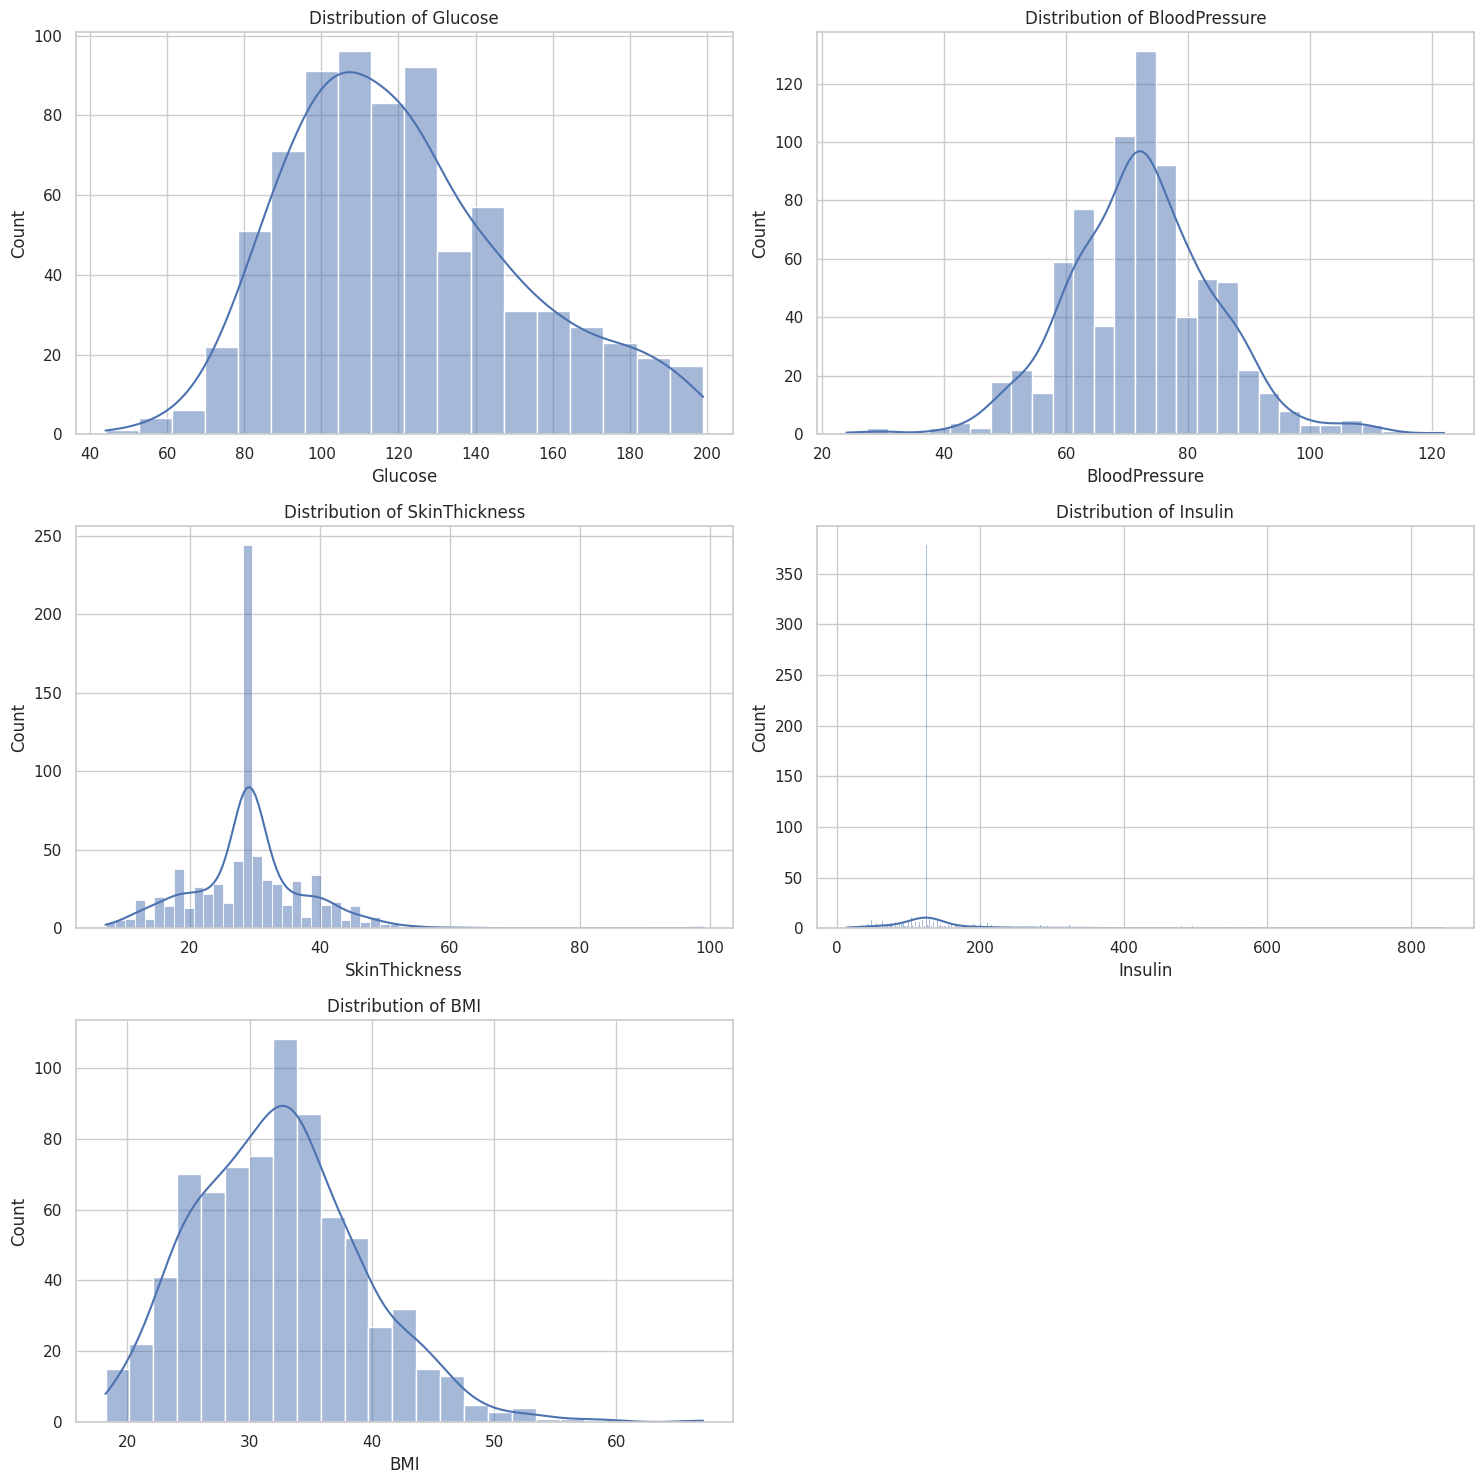

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# List of features to plot
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for i, feature in enumerate(features):
    row, col = divmod(i, 2)
    sns.histplot(data[feature], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')

# Hide the last empty subplot
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()


Create a pair plot to see relationships between features:

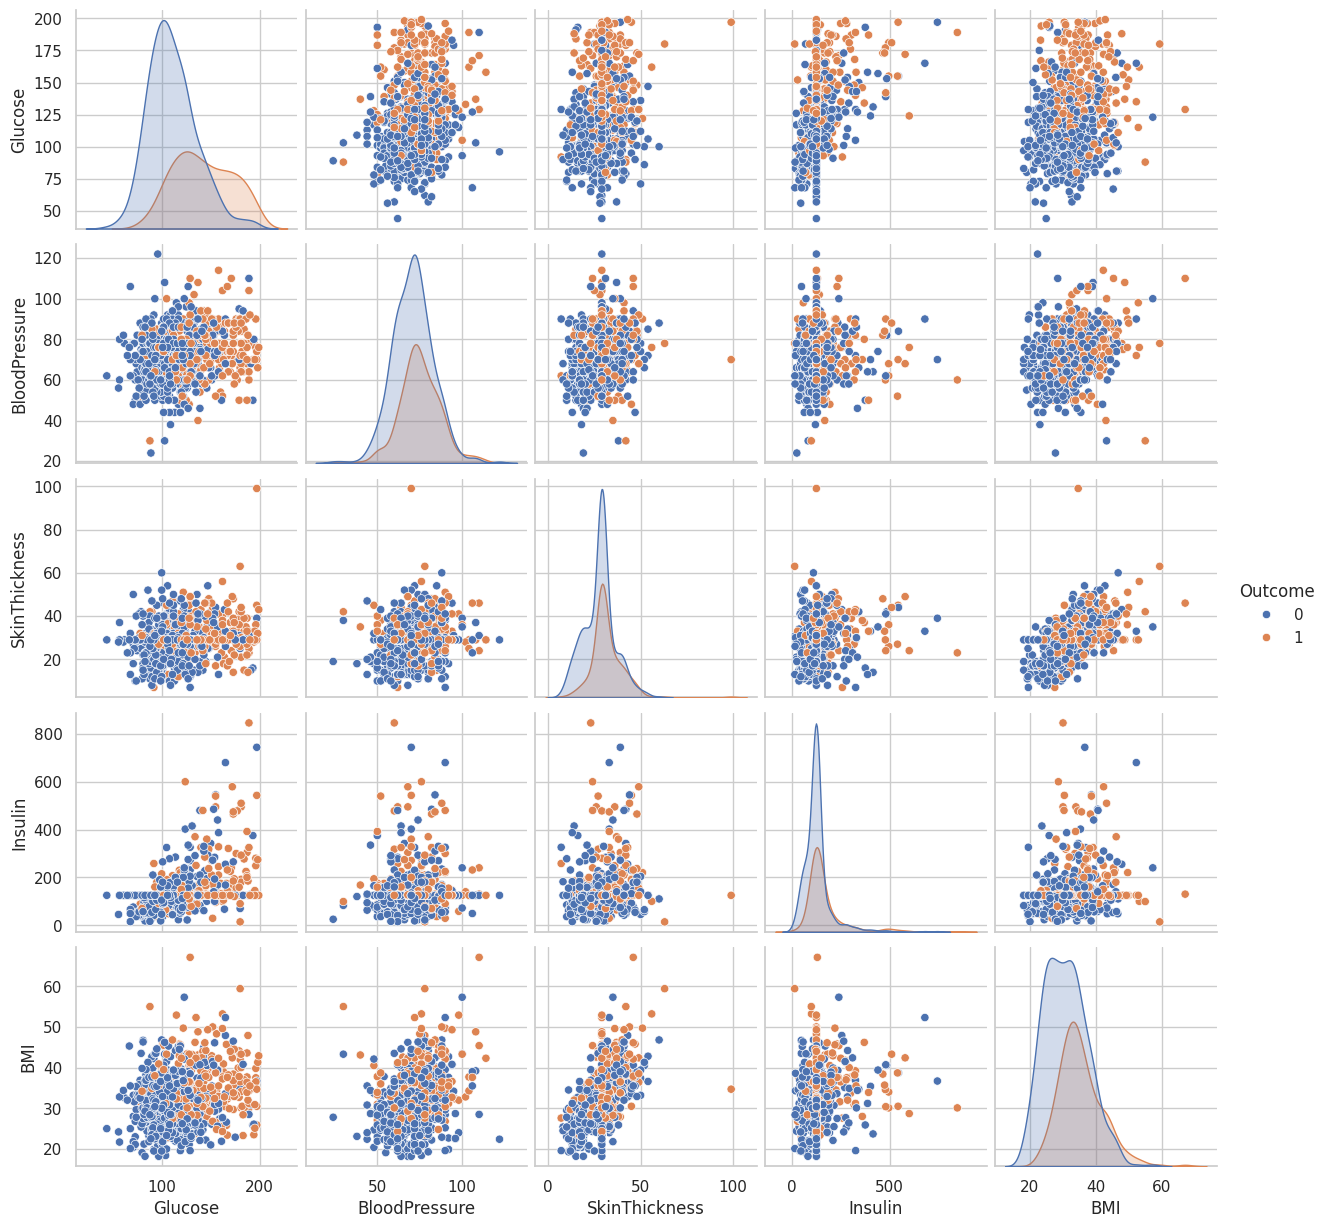

In [ ]:
sns.pairplot(data, vars=features, hue='Outcome', diag_kind='kde')
plt.show()


Create box plots to identify outliers in key features:

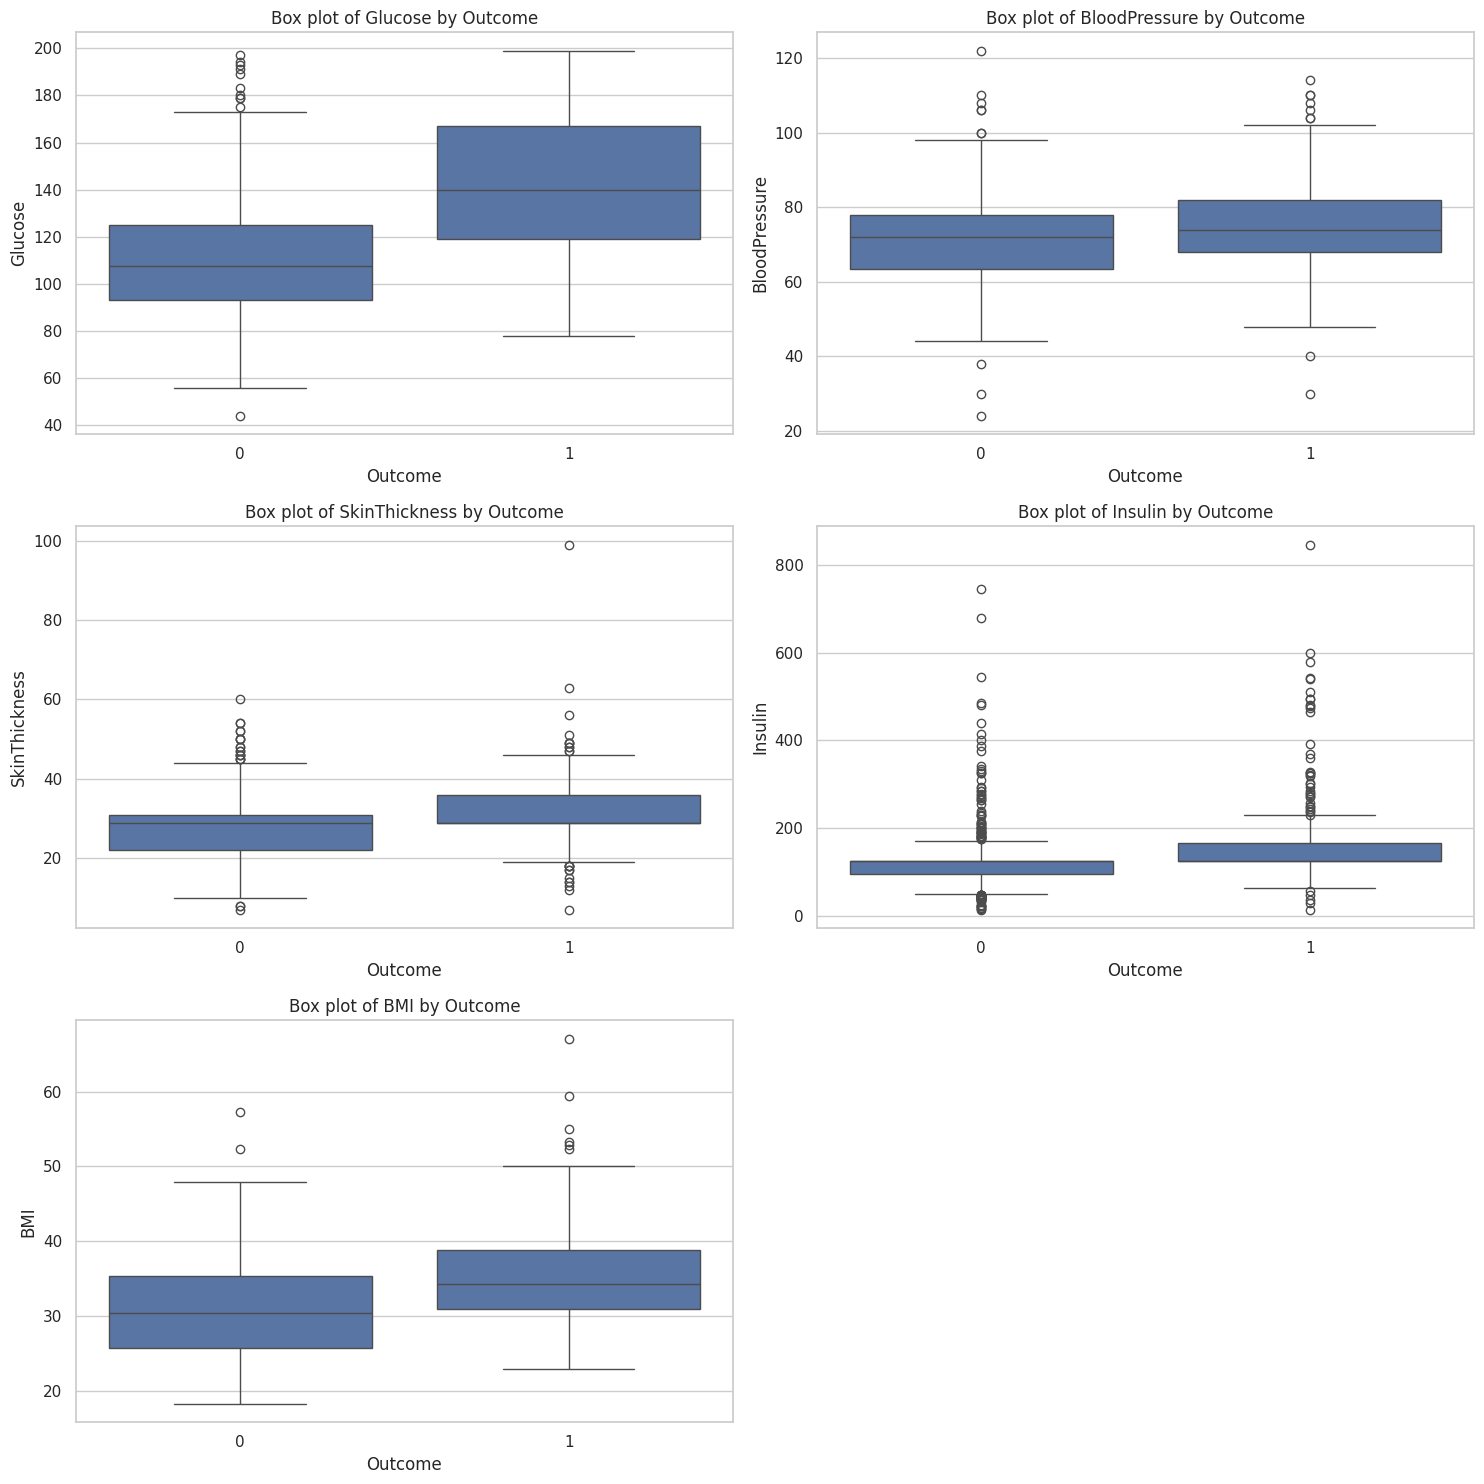

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, feature in enumerate(features):
    row, col = divmod(i, 2)
    sns.boxplot(x='Outcome', y=feature, data=data, ax=axes[row, col])
    axes[row, col].set_title(f'Box plot of {feature} by Outcome')

# Hide the last empty subplot
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()
